<a href="https://colab.research.google.com/github/Praveen-Progs-Hub-2018/Artificial-Intellegence/blob/master/ANN_Softmax_Classifier_by_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Code for Artificial Nueral Network  using Tensorflow and Keras**


*   Developer  : PraveenAI 

*   Program    : Softmax Classification Nueral Network

*   Objective   : Classify the Mulitclass Image data, which consits of Numbers in it.

*   DataSet      : Mnist Dataset


In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import seaborn as sns

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
print("Type of training Data :", type(X_train))
print("Shape of training Data :", X_train.shape)
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Type of training Data : <class 'numpy.ndarray'>
Shape of training Data : (60000, 28, 28)
Number of training examples : 60000 and each image is of shape (28)
Number of training examples : 10000 and each image is of shape (28)


***Reshape the Dependent features from 3Dimensinal to 2Dimentional Data***


In [0]:
X_train = X_train.reshape(X_train.shape[0],(X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape(X_test.shape[0],(X_test.shape[1]*X_test.shape[2]))

In [20]:
print("Type of training Data :", type(X_train))
print("Shape of training Data :", X_train.shape)
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Type of training Data : <class 'numpy.ndarray'>
Shape of training Data : (60000, 784)
Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


**Normalize the Dataset**

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

**Convert Categorical Labels to One-Hot Coded**

In [22]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## **SoftMax Classiffier**

In [0]:
# there are many activation functions ar available ex: tanh, relu, softmax
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
some model parameters

### some model paramters

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

### Model Defind

In [28]:
# start building a model
model = Sequential()

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


### Compile and Fit

In [30]:

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 1.2744 - acc: 0.6992 - val_loss: 0.8125 - val_acc: 0.8312
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.7157 - acc: 0.8403 - val_loss: 0.6084 - val_acc: 0.8616
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.5869 - acc: 0.8602 - val_loss: 0.5269 - val_acc: 0.8740
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.5251 - acc: 0.8694 - val_loss: 0.4806 - val_acc: 0.8806
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4875 - acc: 0.8757 - val_loss: 0.4503 - val_acc: 0.8853
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4616 - acc: 0.8800 - val_loss: 0.4291 - val_acc: 0.8895
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0

### Plot

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    

Test score: 0.3357747725188732
Test accuracy: 0.9078


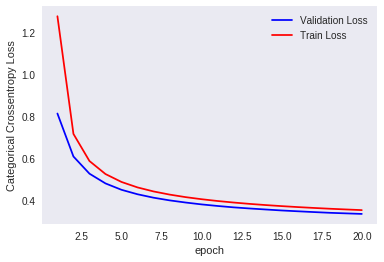

In [73]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)